In [6]:
import zipfile
Path = "/monkey.zip"
f = zipfile.ZipFile(Path)
f.extractall()

In [ ]:
import glob
from PIL import Image
fs = glob.glob("monkey/*")
Image.open(fs[120]).resize((224, 224)).convert("RGB")

In [3]:
import zipfile
Path = "/Orangutan.zip"
f = zipfile.ZipFile(Path)
f.extractall()

In [ ]:
import glob
from PIL import Image
fs = glob.glob("Orangutan/*")
Image.open(fs[120]).resize((224, 224)).convert("RGB")

In [ ]:
import pandas as pd
monkey = glob.glob("monkey/*")
Orangutancat = glob.glob("Orangutan/*")
datas = pd.DataFrame({
    "path":monkey + Orangutancat,
    "ans":[0]* len(monkey) + [1]* len(Orangutancat)
})
datas

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg = VGG16(include_top=False, input_shape=(224, 224, 3))
vgg.summary()

In [ ]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
# 取出每一層
vgg_layers = vgg.layers
for l in vgg_layers:
    l.trainable = False
clf_layers = [
    BatchNormalization(),
    GlobalAveragePooling2D(),
    Dense(2, activation="softmax")
]
model = Sequential(vgg_layers + clf_layers)
model.summary()

In [13]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(), 
       optimizer="adam",
       metrics=["accuracy"])

In [ ]:
# demo pre: 遇處理需要與當初相同
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input
img = Image.open(fs[1]).resize((224, 224)).convert("RGB")
img_np = np.array(img)
preprocess_input(img_np)

In [17]:
from sklearn.model_selection import train_test_split
x, y = np.array(datas["path"]), np.array(datas["ans"])
x, x_test, y, y_test = train_test_split(x, y, test_size=0.05)

In [18]:
# x,y= 資料來源 / batch= 圖片讀取量
def get_data(x, y, batch=20):
    idx = np.random.randint(0, len(x), size=batch)
    y_batch = []
    x_batch, x_batch_ori = [], []
    for i in idx:
      try:
        p = x[i]
        img = Image.open(p).resize((224, 224)).convert("RGB")
        img_np = np.array(img) 
        img_np_pre = preprocess_input(img_np)
        x_batch.append(img_np_pre)
        x_batch_ori.append(img_np)
        y_batch.append(y[i])
      except:
        pass
    return (np.array(x_batch), np.array(y_batch), np.array(x_batch_ori))
x_batch, y_batch, x_batch_ori = get_data(x, y)
print(x_batch.shape)
print(y_batch.shape)
print(x_batch_ori.shape)

(20, 224, 224, 3)
(20,)
(20, 224, 224, 3)


In [19]:
# train_on_batch, test_on_batch
for i in range(20):
  print("-" * 15 , i , "-" * 15)
  x_batch, y_batch, x_batch_ori = get_data(x, y)
  result = model.train_on_batch(x_batch, y_batch)
  print("Train:", result)
  x_batch, y_batch, x_batch_ori = get_data(x, y)
  result = model.test_on_batch(x_batch, y_batch)
  print("Test:", result)

--------------- 0 ---------------
Train: [0.7522180676460266, 0.5]
Test: [1.8241794109344482, 0.550000011920929]
--------------- 1 ---------------
Train: [0.7533528208732605, 0.44999998807907104]
Test: [1.9035937786102295, 0.3499999940395355]
--------------- 2 ---------------
Train: [0.6289798021316528, 0.699999988079071]
Test: [1.8149703741073608, 0.44999998807907104]
--------------- 3 ---------------
Train: [0.7040414810180664, 0.6499999761581421]
Test: [1.063316822052002, 0.6499999761581421]
--------------- 4 ---------------
Train: [0.7166956067085266, 0.6000000238418579]
Test: [1.3543871641159058, 0.550000011920929]
--------------- 5 ---------------
Train: [0.683357834815979, 0.5]
Test: [0.9613234400749207, 0.5]
--------------- 6 ---------------
Train: [0.7462869882583618, 0.4736842215061188]
Test: [0.8291937112808228, 0.75]
--------------- 7 ---------------
Train: [0.7194244265556335, 0.550000011920929]
Test: [1.025294542312622, 0.6000000238418579]
--------------- 8 --------------

In [21]:
x_batch, y_batch, x_batch_ori = get_data(x_test, y_test, 50)
model.evaluate(x_batch, y_batch)

2/2 [==============================] - 0s 97ms/step - loss: 0.4111 - accuracy: 0.7400


[0.4111052453517914, 0.7400000095367432]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


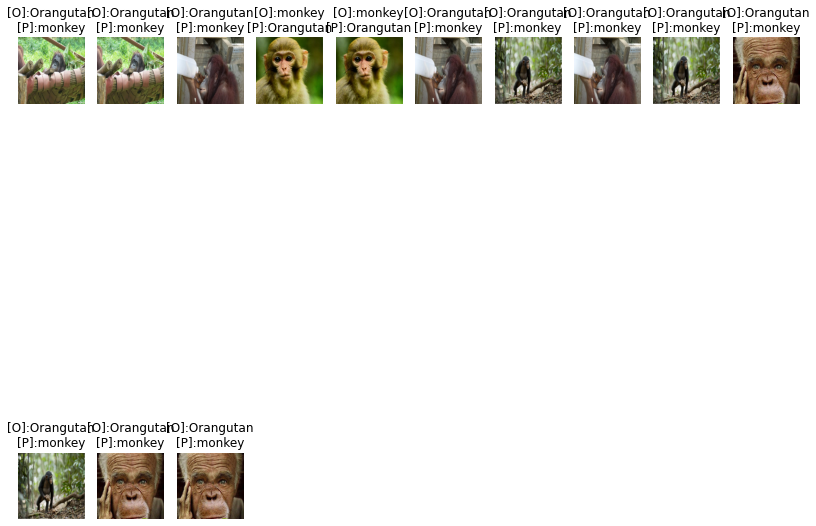

In [22]:
import numpy as np
import matplotlib.pyplot as plt
pre = model.predict_classes(x_batch)
trans = ["monkey", "Orangutan"]
idx = np.nonzero(pre != y_batch)[0][:200]
false_img = x_batch_ori[idx]
false_pre = pre[idx]
false_label = y_batch[idx]
plt.figure(figsize=(14, 14))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[O]:{}\n[P]:{}".format(trans[false_label[i]], trans[false_pre[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(false_img[i])

url:https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Hominidae_%28extant_species%29.jpg/375px-Hominidae_%28extant_species%29.jpg


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


monkey 的機率: 0.103226595
Orangutan 的機率: 0.89677346
答案: Orangutan


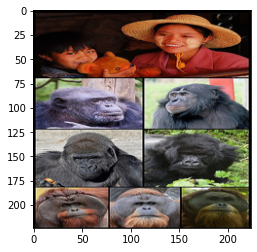

In [29]:
import requests
from PIL import Image
# RGB, RGBA, L(gray)
url = input("url:")
headers = {
  "user-agent":"user-agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36"  
}
response = requests.get(url, headers=headers, stream=True, verify=False)
img = Image.open(response.raw).resize((224, 224)).convert("RGB")
img_np = np.array(img)
img_np_r = preprocess_input(img_np.reshape(1, 224, 224, 3))
proba = model.predict(img_np_r)[0]
for i, p in enumerate(proba):
    print(trans[i], "的機率:", p)
ans = model.predict_classes(img_np_r)[0]
print("答案:", trans[ans])
plt.imshow(img_np)